In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

In [4]:
data=pd.read_csv("/kaggle/input/bvin12/WA_Fn-UseC_-Telco-Customer-Churn (2).csv")

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.shape

(7043, 21)

In [8]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data=data.drop(columns=['customerID'],axis=1)

In [10]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
data['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [12]:
data['gender'].unique()

array(['Female', 'Male'], dtype=object)

In [13]:
numerical_list =['SeniorCitizen','tenure','MonthlyCharges']
for col in data.columns:
    if col not in numerical_list:
        print(data[col].unique())

['Female' 'Male']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['No phone service' 'No' 'Yes']
['DSL' 'Fiber optic' 'No']
['No' 'Yes' 'No internet service']
['Yes' 'No' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['No' 'Yes' 'No internet service']
['Month-to-month' 'One year' 'Two year']
['Yes' 'No']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
['No' 'Yes']


In [14]:
data[data['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [15]:
len(data[data['TotalCharges']==' '])

11

In [16]:
data['TotalCharges']=data['TotalCharges'].replace(' ','0.0')

In [17]:
data[data['TotalCharges']==' ']

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [18]:
data['TotalCharges']=data['TotalCharges'].astype(float)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [20]:
data.shape

(7043, 20)

In [21]:
data.Churn.value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [22]:
# dataset is unevently distrubuted between 2 class
# which is imbalanced data set 
# which creates a bias in the model which is not good practice
#Insights:

#Customer ID removed as it is not required for modelling
#No mmissing values in the dataset
#Missing values in the TotalCharges column were replaced with 0
#Class imbalance identified in the target

In [23]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [24]:
def hist_plot(df,column_name):
  plt.figure(figsize=(5, 3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f"Distribution of {column_name}")

  # calculate the mean and median values for the columns
  col_mean = df[column_name].mean()
  col_median = df[column_name].median()

  # add vertical lines for mean and median
  plt.axvline(col_mean, color="red", linestyle="--", label="Mean")
  plt.axvline(col_median, color="green", linestyle="-", label="Median")

  plt.legend()

  plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


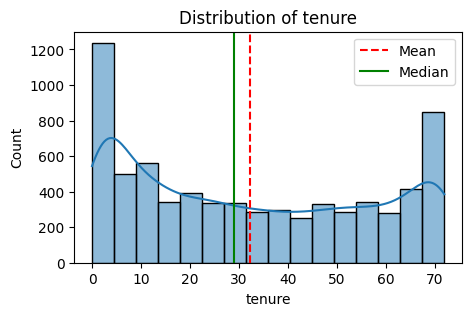

In [25]:
hist_plot(data,'tenure')

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


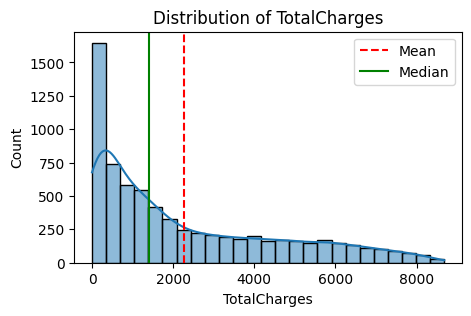

In [26]:
hist_plot(data,'TotalCharges')

In [27]:
def plot_boxplot(df, column_name):

  plt.figure(figsize=(5, 3))
  sns.boxplot(y=df[column_name])
  plt.title(f"Box Plot of {column_name}")
  plt.ylabel(column_name)
  plt.show

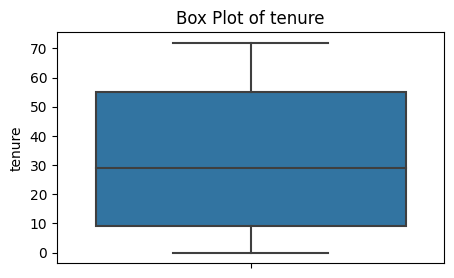

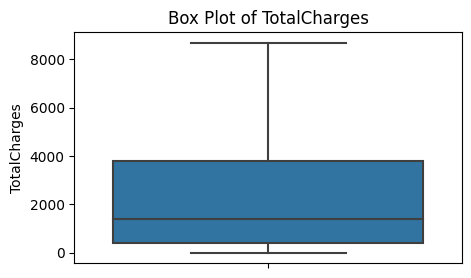

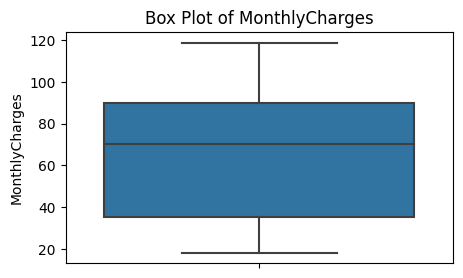

In [28]:
for col in ['tenure','TotalCharges','MonthlyCharges']:
    plot_boxplot(data, col)

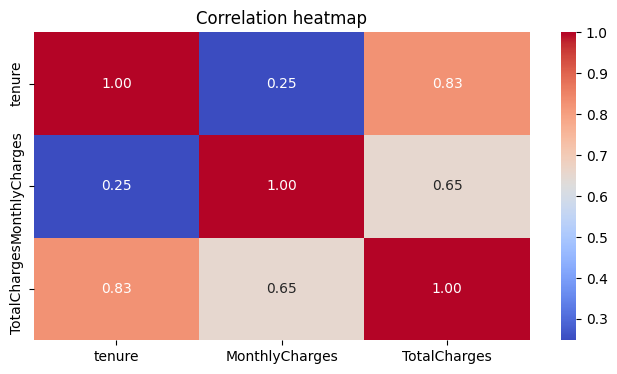

In [29]:
plt.figure(figsize=(8,4))
sns.heatmap(data[['tenure','MonthlyCharges','TotalCharges']].corr(),annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation heatmap')
plt.show()

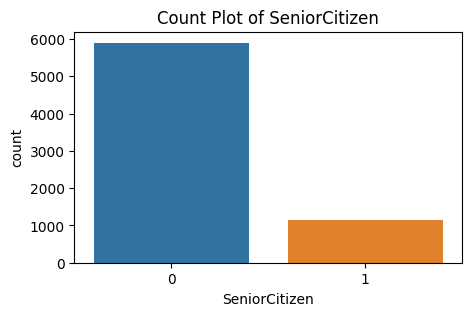

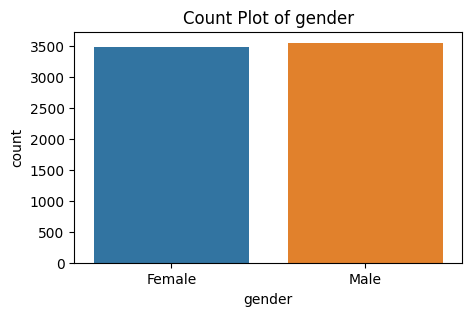

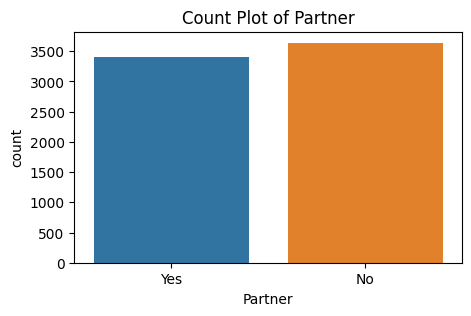

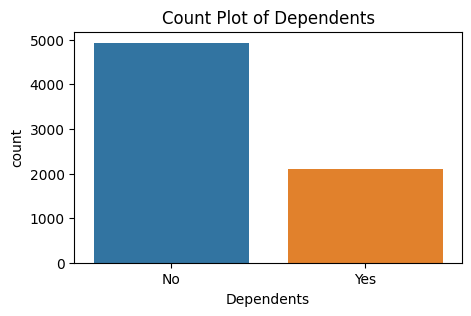

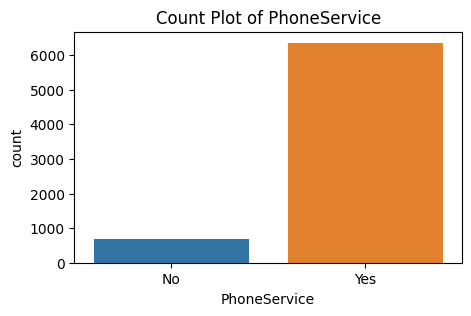

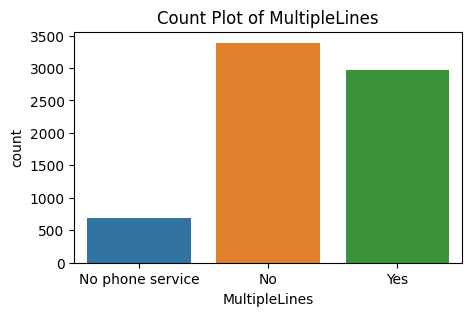

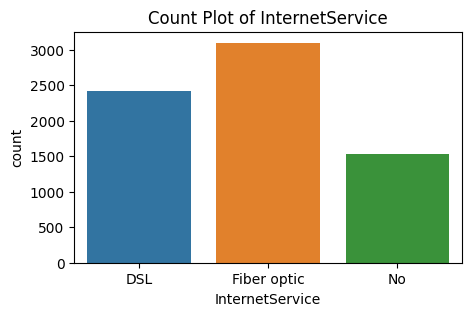

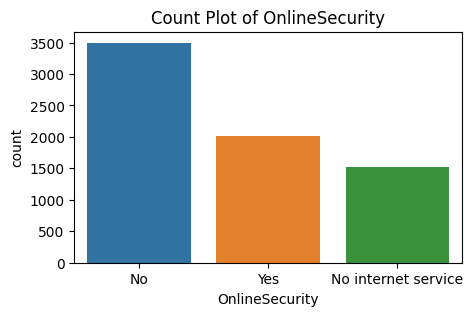

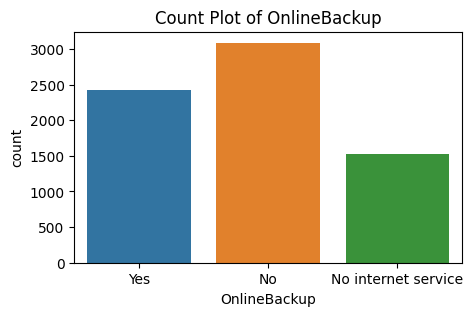

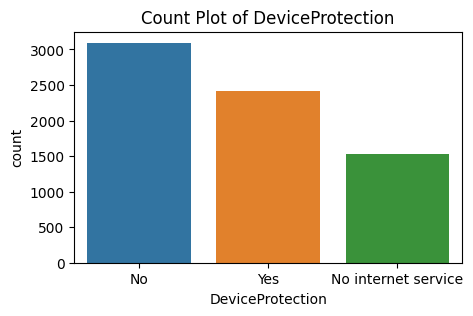

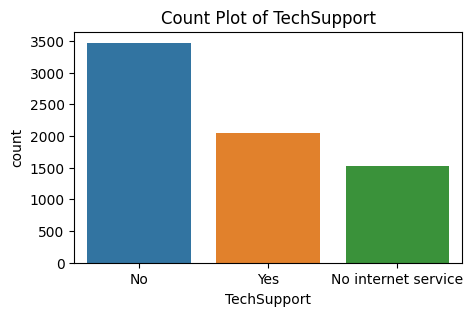

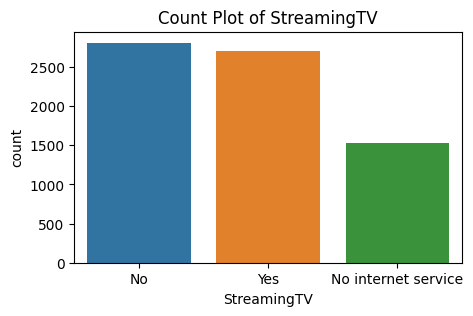

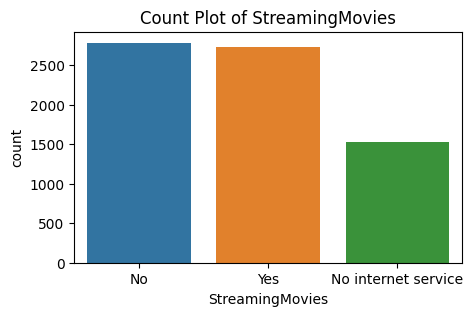

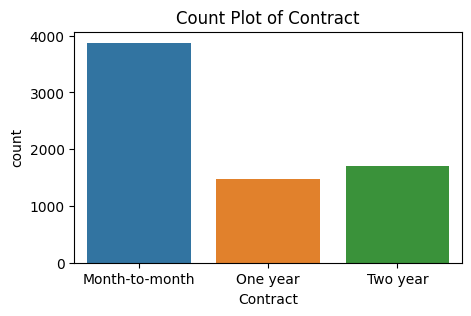

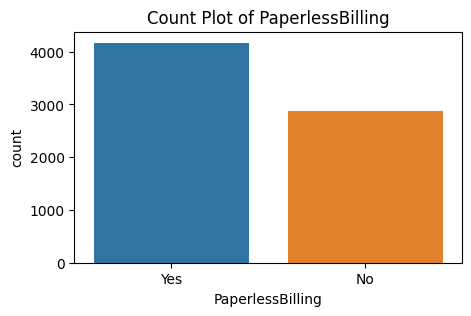

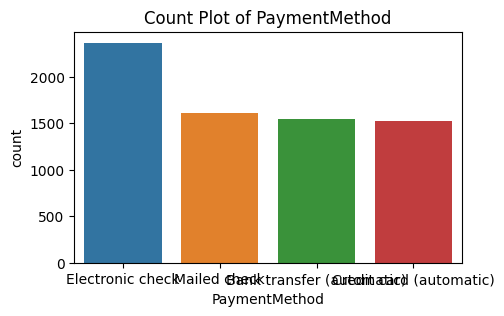

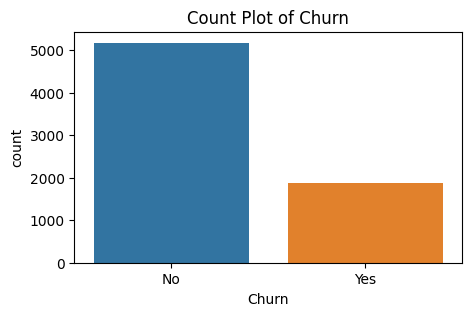

In [30]:
object_cols = data.select_dtypes(include="object").columns.to_list()

object_cols = ["SeniorCitizen"] + object_cols

for col in object_cols:
  plt.figure(figsize=(5, 3))
  sns.countplot(x=data[col])
  plt.title(f"Count Plot of {col}")
  plt.show()

In [31]:
object_columns=data.select_dtypes(include='object').columns

In [32]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')


In [32]:
# we have to label encoding or one hot encoding to cnovert
# convert categorical data into numerical data
# as the model cant train on categorical values it can train only on numerical data

In [33]:
encoders={}
for column in object_columns:
  label_encoder = LabelEncoder()
  data[column] = label_encoder.fit_transform(data[column])
  encoders[column] = label_encoder


# save the encoders to a pickle file
with open("encoders.pkl", "wb") as f:
  pickle.dump(encoders, f)


In [34]:
print(encoders)

{'gender': LabelEncoder(), 'Partner': LabelEncoder(), 'Dependents': LabelEncoder(), 'PhoneService': LabelEncoder(), 'MultipleLines': LabelEncoder(), 'InternetService': LabelEncoder(), 'OnlineSecurity': LabelEncoder(), 'OnlineBackup': LabelEncoder(), 'DeviceProtection': LabelEncoder(), 'TechSupport': LabelEncoder(), 'StreamingTV': LabelEncoder(), 'StreamingMovies': LabelEncoder(), 'Contract': LabelEncoder(), 'PaperlessBilling': LabelEncoder(), 'PaymentMethod': LabelEncoder(), 'Churn': LabelEncoder()}


In [36]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [37]:
X=data.drop(columns='Churn',axis=1)
Y=data['Churn']

In [38]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [39]:
X_train.shape

(5634, 19)

In [40]:
X_test.shape

(1409, 19)

In [41]:
Y_train.shape

(5634,)

In [42]:
Y_test.shape

(1409,)

In [43]:
import pandas as pd
from sklearn.utils import resample

# Load your data into a DataFrame

# Separate majority and minority classes
data_major = data[data.Churn == data.Churn.value_counts().idxmax()]
data_minor = data[data.Churn == data.Churn.value_counts().idxmin()]

# Upsample minority class
data_minor_up = resample(
    data_minor,
    replace=True,             # sample with replacement
    n_samples=len(data_major),  # match majority class size
    random_state=42           # for reproducibility
)

# Combine back to get a balanced dataset
data_balanced = pd.concat([data_major, data_minor_up])
print(data_balanced.Churn.value_counts())


Churn
0    5174
1    5174
Name: count, dtype: int64


In [44]:
X=data_balanced.drop(columns='Churn',axis=1)
Y=data_balanced['Churn']

In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
X_train.shape

(8278, 19)

In [47]:
Y_train.shape

(8278,)

In [48]:
print(X_test.shape)
print(Y_test.shape)

(2070, 19)
(2070,)


In [49]:
Y_train.value_counts()

Churn
1    4148
0    4130
Name: count, dtype: int64

In [50]:
from sklearn.linear_model import LogisticRegression
models = {
    "LogisticRegression":LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42)
}

In [51]:
cv_scores = {}

# perform 5-fold cross validation for each model
for model_name, model in models.items():
  print(f"Training {model_name} with default parameters")
  scores = cross_val_score(model, X_train, Y_train, cv=5, scoring="accuracy")
  cv_scores[model_name] = scores
  print(f"{model_name} cross-validation accuracy: {np.mean(scores):.2f}")
  print("-"*70)

Training LogisticRegression with default parameters


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

LogisticRegression cross-validation accuracy: 0.76
----------------------------------------------------------------------
Training Decision Tree with default parameters
Decision Tree cross-validation accuracy: 0.85
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest cross-validation accuracy: 0.88
----------------------------------------------------------------------
Training XGBoost with default parameters
XGBoost cross-validation accuracy: 0.85
----------------------------------------------------------------------


In [52]:
cv_scores

{'LogisticRegression': array([0.75845411, 0.76570048, 0.76388889, 0.77401813, 0.73897281]),
 'Decision Tree': array([0.86594203, 0.86231884, 0.84601449, 0.84712991, 0.84350453]),
 'Random Forest': array([0.88103865, 0.88768116, 0.89070048, 0.89123867, 0.86586103]),
 'XGBoost': array([0.8423913 , 0.85144928, 0.86413043, 0.86102719, 0.83927492])}

In [60]:
# Random Forest gives the highest accuracy compared to other models with default parameters

In [53]:
rfc = RandomForestClassifier(random_state=42)

In [54]:
rfc.fit(X_train, Y_train)

RandomForestClassifier(random_state=42)

In [55]:
print(Y_test.value_counts())

Churn
0    1044
1    1026
Name: count, dtype: int64


In [56]:
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(Y_test, y_test_pred))
print("Classification Report:\n", classification_report(Y_test, y_test_pred))

Accuracy Score:
 0.923671497584541
Confsuion Matrix:
 [[914 130]
 [ 28 998]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.88      0.92      1044
           1       0.88      0.97      0.93      1026

    accuracy                           0.92      2070
   macro avg       0.93      0.92      0.92      2070
weighted avg       0.93      0.92      0.92      2070



In [57]:
from sklearn.model_selection import  RandomizedSearchCV

In [58]:
# Initializing models
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)
xgboost_classifier = XGBClassifier(random_state=42)

In [59]:
param_grid_dt = {
    "criterion": ["gini", "entropy"],
    "max_depth": [None, 10, 20, 30, 50, 70],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


param_grid_rf = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}


param_grid_xgb = {
    "n_estimators": [50, 100, 200, 500],
    "max_depth": [3, 5, 7, 10],
    "learning_rate": [0.01, 0.1, 0.2, 0.3],
    "subsample": [0.5, 0.7, 1.0],
    "colsample_bytree": [0.5, 0.7, 1.0]
}

In [60]:
# hyperparameter tunig for 3 tree based models
# based on cross validation set we can change the values of hyperparamters for model to performance better

# the below steps can be automated by using a for loop or by using a pipeline

# perform RandomizedSearchCV for each model
random_search_dt = RandomizedSearchCV(estimator=decision_tree, param_distributions=param_grid_dt, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_rf = RandomizedSearchCV(estimator=random_forest, param_distributions=param_grid_rf, n_iter=20, cv=5, scoring="accuracy", random_state=42)
random_search_xgb = RandomizedSearchCV(estimator=xgboost_classifier, param_distributions=param_grid_xgb, n_iter=20, cv=5, scoring="accuracy", random_state=42)


In [62]:
# fit the models
random_search_dt.fit(X_train, Y_train)
random_search_rf.fit(X_train, Y_train)
random_search_xgb.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_iter=20,
                   param_distributions={'colsample_bytree': [0.5, 0.7, 1.0],
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500],
                                        'subsample': [0.5, 0.7, 1.0]},
                   random_state=42, scoring='accuracy')

In [63]:
best_model = None
best_score = 0

if random_search_dt.best_score_ > best_score:
  best_model = random_search_dt.best_estimator_
  best_score = random_search_dt.best_score_

if random_search_rf.best_score_ > best_score:
  best_model = random_search_rf.best_estimator_
  best_score = random_search_rf.best_score_

if random_search_xgb.best_score_ > best_score:
  best_model = random_search_xgb.best_estimator_
  best_score = random_search_xgb.best_score_


In [64]:
print(f"Best Model: {best_model}")
print(f"Best Cross-Validation Accuracy: {best_score:.2f}")

Best Model: RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)
Best Cross-Validation Accuracy: 0.89


In [65]:
rfc=RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=50,
                       random_state=42)

In [66]:
rfc.fit(X_train,Y_train)
y_train_pred = rfc.predict(X_train)

print("Accuracy Score:\n", accuracy_score(Y_train, y_train_pred))
print("Confsuion Matrix:\n", confusion_matrix(Y_train, y_train_pred))
print("Classification Report:\n", classification_report(Y_train, y_train_pred))

Accuracy Score:
 0.9979463638560039
Confsuion Matrix:
 [[4115   15]
 [   2 4146]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4130
           1       1.00      1.00      1.00      4148

    accuracy                           1.00      8278
   macro avg       1.00      1.00      1.00      8278
weighted avg       1.00      1.00      1.00      8278



In [67]:
y_test_pred = rfc.predict(X_test)

print("Accuracy Score:\n", accuracy_score(Y_test, y_test_pred))
print("Confsuion Matrix:\n", confusion_matrix(Y_test, y_test_pred))
print("Classification Report:\n", classification_report(Y_test, y_test_pred))

Accuracy Score:
 0.9270531400966183
Confsuion Matrix:
 [[932 112]
 [ 39 987]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.89      0.93      1044
           1       0.90      0.96      0.93      1026

    accuracy                           0.93      2070
   macro avg       0.93      0.93      0.93      2070
weighted avg       0.93      0.93      0.93      2070

